# Outlier/Anomaly Detection
In this section, we find the anomalies and categorize them as "System fault" or "external event". To this end, we use two kinds of analysis: Univariat analysis, and multvariate analysis. In the former, we find outliers for each feature, and, in the latter, we consider the whole feature space to find more accurate outliers. The main reason for the univariate analysis two-fold: 
1. It gives us a more detail information about why the outlier happens in an obsevation.
2. It helps us to categorize an outlier into either a "system fault" or "external event".  

In [101]:
# Import Libraries

import pandas as pd
import numpy as np
from numpy import std, mean
import datetime as dt
from copy import deepcopy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import RandomizedSearchCV

%matplotlib inline

In [102]:
# Utility Functions

# find the outliers for a given feature
def find_anomalies(data):
    anomalies = []
    
    # Computing IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
     
    lower_limit  = Q1 - 1.5 * IQR 
    upper_limit = Q3 + 1.5 * IQR
    
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

# draw box plot for a given feautre
def draw_boxplot(feature, title, data, orient='h', size=(8,4)):
    sns.set(style="whitegrid")
    plt.rcParams['figure.figsize']=size
    plt.title('Box Plot - '+title)
    sns.boxplot(data=data[feature], orient=orient);

In [103]:
# Deserialize the datasets

df_hourly = pd.read_pickle('Data/df_hourly_v2')

## Univariate Analysis
As we saw in the previous section, the data is not normally distirbuted. Therefore, using the standard deviation method is not suitable to find the outliers. We then use the **Interquartile Range method** to find the outliers.

No outlier in the hourly data:

In [104]:
ozone_outliers = find_anomalies(df_hourly['Ozone'])
set([round(x, 3) for x in ozone_outliers])

set()

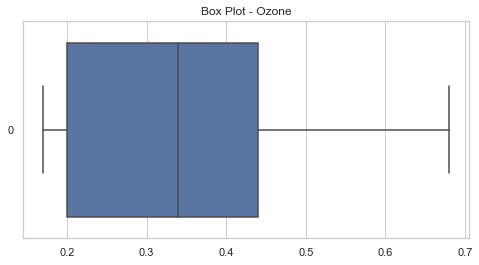

In [105]:
draw_boxplot('Ozone', 'Ozone', df_hourly)

### Outliers in Hydrogen Sulfide (H2S)
The values considered as outliers for H2S are as follow:

In [106]:
H2S_outliers = find_anomalies(df_hourly['H2S'])
set(H2S_outliers)

{2e-05,
 3e-05,
 4e-05,
 5e-05,
 0.00012,
 0.00017,
 0.00018,
 0.00021,
 0.00025,
 0.00027,
 0.00028,
 0.00033,
 0.00063,
 0.0008,
 0.0009,
 0.00091,
 0.00098,
 0.00102,
 0.00128,
 0.00153,
 0.00198,
 0.002}

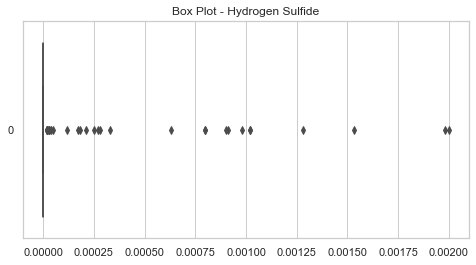

In [107]:
draw_boxplot('H2S', 'Hydrogen Sulfide', df_hourly)

In [108]:
df_hourly['H2S_Out'] = df_hourly['H2S'].isin(H2S_outliers)
len(df_hourly[df_hourly['H2S_Out']])

34

In [109]:
df_hourly[df_hourly['H2S_Out']].iloc[:,1:9]

,H2S,VOC,CO2,PM10,Temp_int,Humidity_int,Temp_ext,Humidity_ext
Time,,,,,,,,
2020-05-26 08:00:00,0.00080,0.268,471,14.678,24,46,23,48
2020-05-26 09:00:00,0.00027,0.763,512,5.800,24,47,23,50
2020-05-26 10:00:00,0.00017,0.487,553,6.047,24,49,24,52
2020-05-26 20:00:00,0.00003,0.239,553,7.593,24,52,25,51
2020-05-26 21:00:00,0.00005,0.223,512,7.773,24,54,25,53
2020-05-26 22:00:00,0.00003,0.209,485,8.599,24,55,25,54
2020-05-26 23:00:00,0.00003,0.198,462,9.068,24,56,25,55
2020-05-27 00:00:00,0.00003,0.186,444,8.484,24,57,25,56
2020-05-27 01:00:00,0.00025,0.179,436,8.630,24,58,25,56


The following plot represents such outliers:

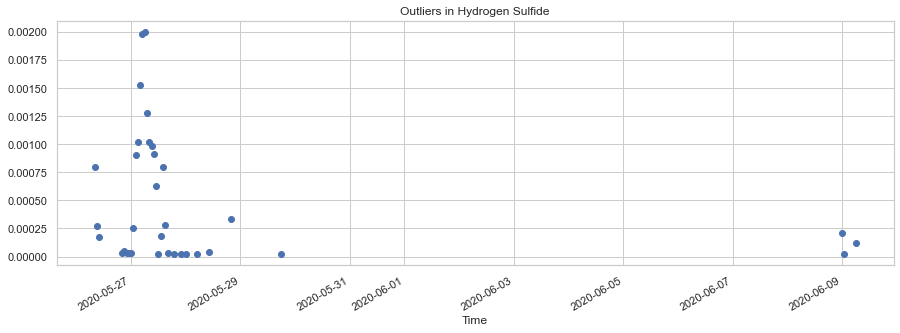

In [110]:
df_hourly[df_hourly['H2S_Out']]['H2S'].plot(style='o', figsize=(15,5), title='Outliers in Hydrogen Sulfide');

### Outliers in VOC
The values considered as outliers for Total VOCs are as follow:

In [111]:
VOC_outliers = find_anomalies(df_hourly['VOC'])
set([round(x, 2) for x in VOC_outliers])

{0.24,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.33,
 0.34,
 0.35,
 0.36,
 0.37,
 0.38,
 0.42,
 0.43,
 0.46,
 0.49,
 0.5,
 0.61,
 0.64,
 0.67,
 0.71,
 0.72,
 0.76,
 0.78,
 0.92,
 1.14,
 1.78,
 2.12}

***I think these levels of total VOCs are really abnormal. As long as I know, something between .001 to .003 ppm is considered high. So, I believe these outliers should be the casue of system fault.***

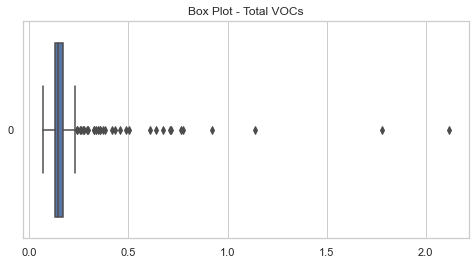

In [112]:
draw_boxplot('VOC', 'Total VOCs', df_hourly)

In [113]:
df_hourly['VOC_Out'] = df_hourly['VOC'].isin(VOC_outliers)
len(df_hourly[df_hourly['VOC_Out']])

32

In [114]:
df_hourly[df_hourly['VOC_Out']].iloc[:,1:9]

,H2S,VOC,CO2,PM10,Temp_int,Humidity_int,Temp_ext,Humidity_ext
Time,,,,,,,,
2020-05-26 08:00:00,0.00080,0.268,471,14.678,24,46,23,48
2020-05-26 09:00:00,0.00027,0.763,512,5.800,24,47,23,50
2020-05-26 10:00:00,0.00017,0.487,553,6.047,24,49,24,52
2020-05-26 11:00:00,0.00000,0.417,581,7.701,24,50,24,52
2020-05-26 12:00:00,0.00000,0.328,620,4.720,24,50,24,51
2020-05-26 13:00:00,0.00000,0.370,650,4.189,24,50,24,51
2020-05-26 14:00:00,0.00000,0.355,715,5.741,24,51,24,51
2020-05-26 15:00:00,0.00000,0.356,762,9.196,24,51,24,49
2020-05-26 16:00:00,0.00000,0.344,773,8.425,24,51,25,48


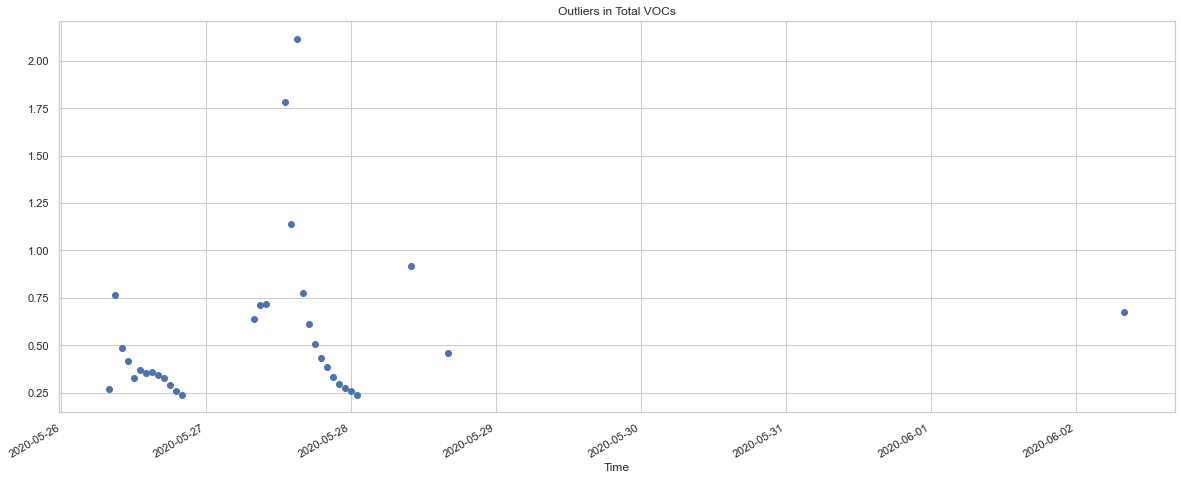

In [115]:
df_hourly[df_hourly['VOC_Out']]['VOC'].plot(style='o', figsize=(20,8), title='Outliers in Total VOCs');

### Outliers in CO2 (Carbon Dioxide)

In [116]:
CO2_outliers = find_anomalies(df_hourly['CO2'])
set([round(x) for x in CO2_outliers])

{471,
 475,
 479,
 484,
 485,
 506,
 512,
 518,
 529,
 542,
 553,
 575,
 581,
 604,
 607,
 614,
 620,
 629,
 631,
 634,
 647,
 650,
 685,
 694,
 711,
 715,
 734,
 740,
 762,
 771,
 773}

***These are not normal background concentration in outdoor ambient air; however, they are concentrations typical of occupied indoor spaces with good air exchange.***

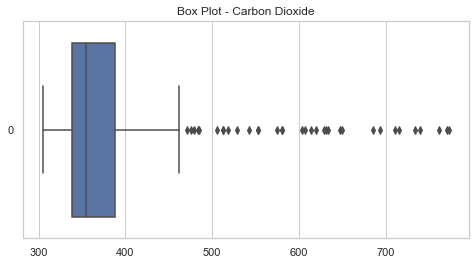

In [117]:
draw_boxplot('CO2', 'Carbon Dioxide', df_hourly)

In [118]:
df_hourly['CO2_Out'] = df_hourly['CO2'].isin(CO2_outliers)
len(df_hourly[df_hourly['CO2_Out']])

34

In [119]:
df_hourly[df_hourly['CO2_Out']].iloc[:,1:9]

,H2S,VOC,CO2,PM10,Temp_int,Humidity_int,Temp_ext,Humidity_ext
Time,,,,,,,,
2020-05-26 08:00:00,0.00080,0.268,471,14.678,24,46,23,48
2020-05-26 09:00:00,0.00027,0.763,512,5.800,24,47,23,50
2020-05-26 10:00:00,0.00017,0.487,553,6.047,24,49,24,52
2020-05-26 11:00:00,0.00000,0.417,581,7.701,24,50,24,52
2020-05-26 12:00:00,0.00000,0.328,620,4.720,24,50,24,51
2020-05-26 13:00:00,0.00000,0.370,650,4.189,24,50,24,51
2020-05-26 14:00:00,0.00000,0.355,715,5.741,24,51,24,51
2020-05-26 15:00:00,0.00000,0.356,762,9.196,24,51,24,49
2020-05-26 16:00:00,0.00000,0.344,773,8.425,24,51,25,48


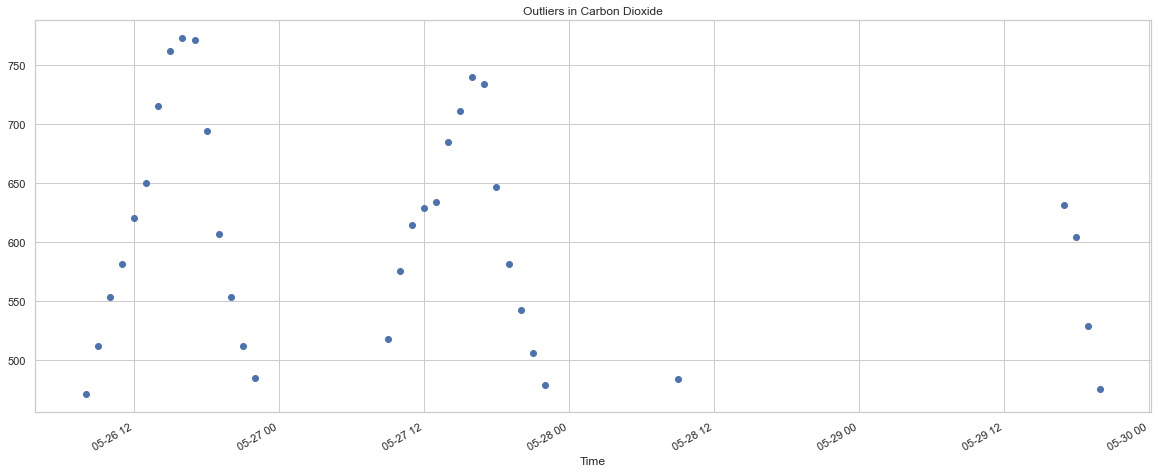

In [120]:
df_hourly[df_hourly['CO2_Out']]['CO2'].plot(style='o', figsize=(20,8), title='Outliers in Carbon Dioxide');

### Outliers in Particulate Matters

In [121]:
PM_outliers = find_anomalies(df_hourly['PM10'])
set([round(x) for x in PM_outliers])

{15, 16, 18, 20, 28}

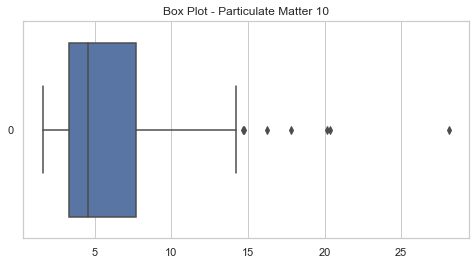

In [122]:
draw_boxplot('PM10', 'Particulate Matter 10', df_hourly)

In [123]:
df_hourly['PM_Out'] = df_hourly['PM10'].isin(PM_outliers)
len(df_hourly[df_hourly['PM_Out']])

7

In [124]:
df_hourly[df_hourly['PM_Out']].iloc[:, 1:9]

,H2S,VOC,CO2,PM10,Temp_int,Humidity_int,Temp_ext,Humidity_ext
Time,,,,,,,,
2020-05-26 08:00:00,0.0008,0.268,471,14.678,24,46,23,48
2020-06-03 11:00:00,0.0000,0.167,342,14.772,26,59,24,64
2020-06-03 12:00:00,0.0000,0.161,324,17.784,26,62,27,52
2020-06-03 13:00:00,0.0000,0.158,323,20.173,26,63,28,50
2020-06-03 14:00:00,0.0000,0.151,313,28.114,26,65,32,39
2020-06-03 15:00:00,0.0000,0.143,305,20.356,26,64,33,37
2020-06-03 16:00:00,0.0000,0.138,314,16.233,27,62,33,37


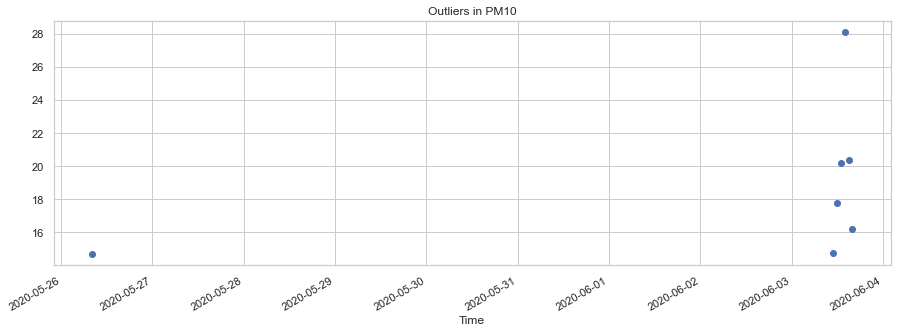

In [125]:
df_hourly[df_hourly['PM_Out']]['PM10'].plot(style='o', figsize=(15,5), title='Outliers in PM10');

### Outliers in Internal Temperatures

In [126]:
tempint_outliers = find_anomalies(df_hourly['Temp_int'])
set([round(x) for x in tempint_outliers])

{24, 27, 28, 29, 30}

***These outlier are because 26 is the most common value for internal temperature; however, they are normal temperatures. In the following, I visually show their relations with external temperature. Taking look at the corresponding plot, we could infer that some of them may not be considered as outliers.*** 

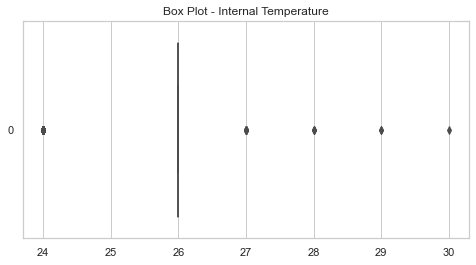

In [127]:
draw_boxplot('Temp_int', 'Internal Temperature', df_hourly)

In [128]:
df_hourly['Tempint_Out'] = df_hourly['Temp_int'].isin(tempint_outliers)
len(df_hourly[df_hourly['Tempint_Out']])

64

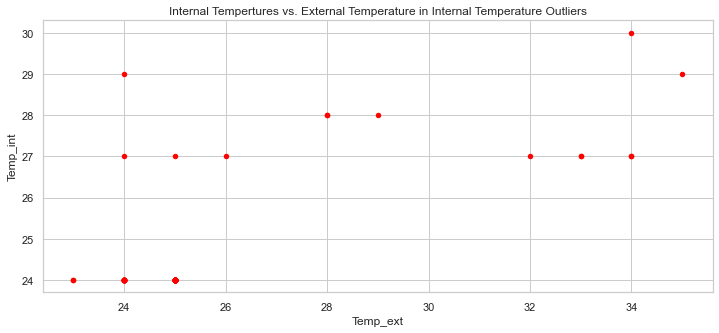

In [129]:
df_hourly[df_hourly['Tempint_Out']].plot('Temp_ext', 'Temp_int', c = 'red', kind='scatter', 
                                 title='Internal Tempertures vs. External Temperature in Internal Temperature Outliers',
                                figsize=(12, 5));

In [130]:
df_hourly[df_hourly['Tempint_Out']].iloc[:,1:10]

,H2S,VOC,CO2,PM10,Temp_int,Humidity_int,Temp_ext,Humidity_ext,H2S_Out
Time,,,,,,,,,
2020-05-26 08:00:00,0.00080,0.268,471,14.678,24,46,23,48,True
2020-05-26 09:00:00,0.00027,0.763,512,5.800,24,47,23,50,True
2020-05-26 10:00:00,0.00017,0.487,553,6.047,24,49,24,52,True
2020-05-26 11:00:00,0.00000,0.417,581,7.701,24,50,24,52,False
2020-05-26 12:00:00,0.00000,0.328,620,4.720,24,50,24,51,False
...,...,...,...,...,...,...,...,...,...
2020-06-04 15:00:00,0.00000,0.146,317,6.455,27,48,33,31,False
2020-06-04 16:00:00,0.00000,0.130,351,6.977,29,47,35,28,False
2020-06-04 17:00:00,0.00000,0.122,366,6.933,30,43,34,31,False


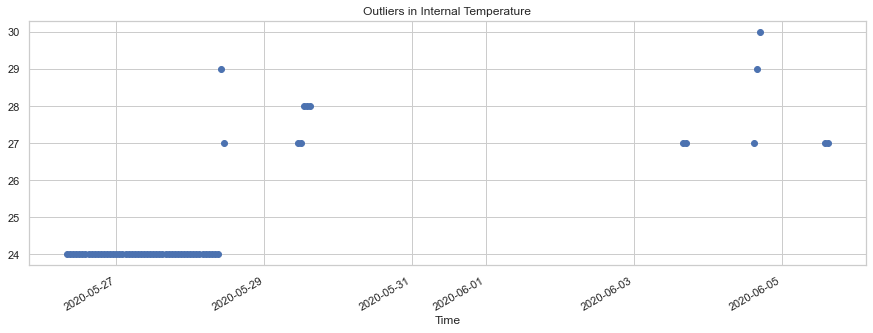

In [131]:
df_hourly[df_hourly['Tempint_Out']]['Temp_int'].plot(style='o', 
                                                     figsize=(15,5), 
                                                     title='Outliers in Internal Temperature');

### Outliers in Internal Humidity
There is no outlier in internal humidity:

In [132]:
humidint_outliers = find_anomalies(df_hourly['Humidity_int'])
set([round(x) for x in humidint_outliers])

set()

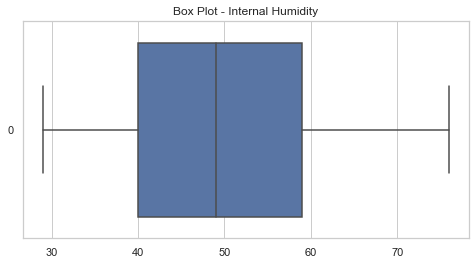

In [133]:
draw_boxplot('Humidity_int', 'Internal Humidity', df_hourly)

### Outliers in External Temperature

In [134]:
tempext_outliers = find_anomalies(df_hourly['Temp_ext'])
set(tempext_outliers)

{14, 32, 33, 34, 35}

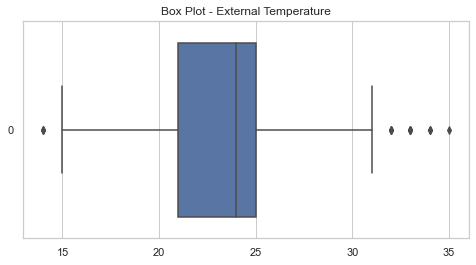

In [135]:
draw_boxplot('Temp_ext', 'External Temperature', df_hourly)

In [136]:
df_hourly['Tempext_Out'] = df_hourly['Temp_ext'].isin(tempext_outliers)
len(df_hourly[df_hourly['Tempext_Out']])

16

In [137]:
df_hourly[df_hourly['Tempext_Out']].iloc[:, 1:9]

,H2S,VOC,CO2,PM10,Temp_int,Humidity_int,Temp_ext,Humidity_ext
Time,,,,,,,,
2020-06-03 14:00:00,0.0,0.151,313,28.114,26,65,32,39
2020-06-03 15:00:00,0.0,0.143,305,20.356,26,64,33,37
2020-06-03 16:00:00,0.0,0.138,314,16.233,27,62,33,37
2020-06-03 17:00:00,0.0,0.139,314,10.830,27,61,32,37
2020-06-04 14:00:00,0.0,0.145,320,5.658,26,48,32,31
2020-06-04 15:00:00,0.0,0.146,317,6.455,27,48,33,31
2020-06-04 16:00:00,0.0,0.130,351,6.977,29,47,35,28
2020-06-04 17:00:00,0.0,0.122,366,6.933,30,43,34,31
2020-06-05 14:00:00,0.0,0.155,345,6.245,27,61,34,36


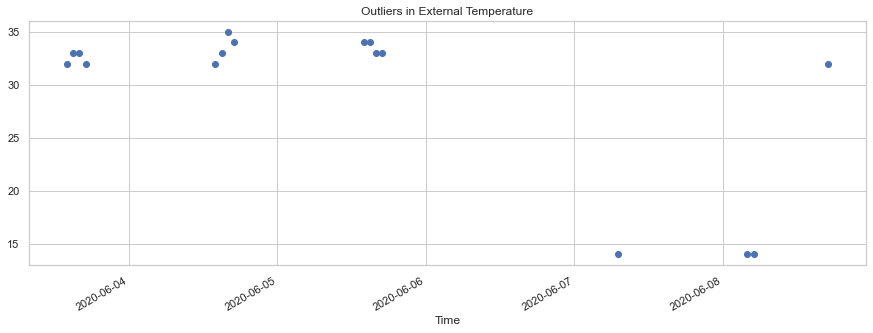

In [138]:
df_hourly[df_hourly['Tempext_Out']]['Temp_ext'].plot(style='o', 
                                                     figsize=(15,5), 
                                                     title='Outliers in External Temperature');

### Outliers in External Humidity
There is no outlier in external humidity:

In [139]:
humidext_outliers = find_anomalies(df_hourly['Humidity_ext'])
set(humidext_outliers)

set()

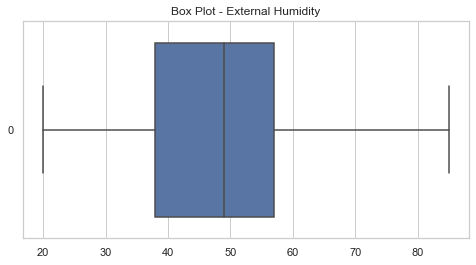

In [140]:
draw_boxplot('Humidity_ext', 'External Humidity', df_hourly)

In [141]:
df_hourly['Humidext_Out'] = df_hourly['Humidity_ext'].isin(tempext_outliers)
len(df_hourly[df_hourly['Humidext_Out']])

18

In [142]:
df_hourly[df_hourly['Humidext_Out']].iloc[:, 1:9]

,H2S,VOC,CO2,PM10,Temp_int,Humidity_int,Temp_ext,Humidity_ext
Time,,,,,,,,
2020-05-31 09:00:00,0.0,0.128,334,2.712,26,58,23,35
2020-05-31 10:00:00,0.0,0.126,333,2.571,26,57,23,33
2020-05-31 11:00:00,0.0,0.124,344,2.699,26,57,23,32
2020-06-01 04:00:00,0.0,0.131,347,3.343,26,47,23,32
2020-06-01 05:00:00,0.0,0.132,350,3.171,26,46,23,32
2020-06-01 06:00:00,0.0,0.133,353,3.443,26,45,23,32
2020-06-01 07:00:00,0.0,0.134,355,3.487,26,45,23,32
2020-06-01 08:00:00,0.0,0.127,352,3.204,26,43,21,35
2020-06-01 10:00:00,0.0,0.101,337,3.234,26,37,18,35


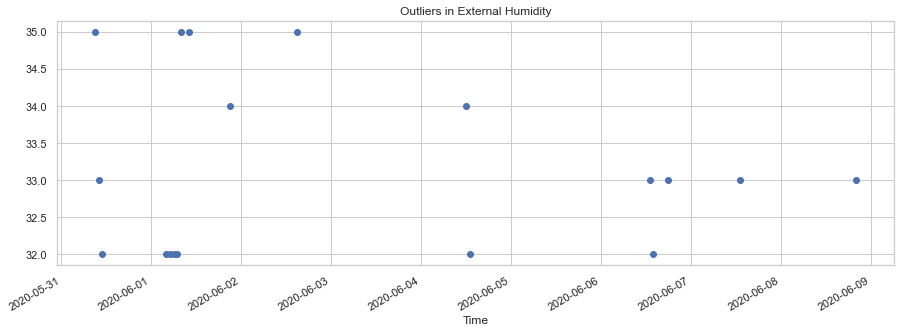

In [143]:
df_hourly[df_hourly['Humidext_Out']]['Humidity_ext'].plot(style='o', 
                                                          figsize=(15,5), 
                                                          title='Outliers in External Humidity');

### Categorize Outiliers 
Assumption: Any outlier where we see an external outlier (ie, in either external temperature or external humidity) is considered as "external events". Others are considered as "system fault" (**to be checked**).

In the following, we add 3 Boolean columns into the dataset:
1. `Outlier_uni`: True if the corresponding observation is considered outlier in the univariate analysis.
2. `External_Outlier`: True if it is an external outlier
3. `Sytem_Outlier`: True if it is an outlier and not an external outlier

In [144]:
ext_outliers = np.sum(df_hourly[['Tempext_Out', 'Humidext_Out']], axis=1) > 0
all_outliers = np.sum(df_hourly[['H2S_Out', 'VOC_Out', 'CO2_Out', 'PM_Out', 
                                     'Tempint_Out', 'Tempext_Out', 'Humidext_Out']], 
                              axis=1) > 0
int_outliers = (np.array(all_outliers) & ~np.array(ext_outliers)).tolist()

In [145]:
df_hourly['Outlier_uni'] = all_outliers
df_hourly['External_Outlier'] = ext_outliers
df_hourly['System_Outlier'] = int_outliers

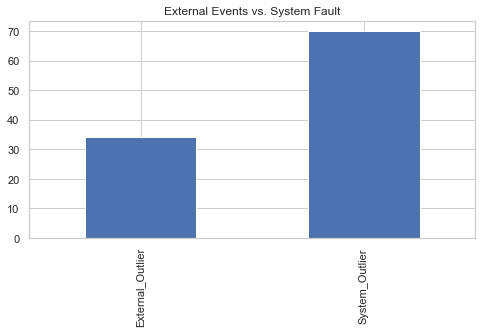

In [146]:
df = df_hourly[['External_Outlier', 'System_Outlier']]
df = df.apply(pd.value_counts)
df.iloc[1,].plot.bar(title='External Events vs. System Fault');

The number of observations that have some outliers is **104** (~**30%**). This doesn't make much sense.

In [147]:
np.sum(df_hourly['Outlier_uni'])

104

In [148]:
np.sum(df_hourly['Outlier_uni'])/len(df_hourly)*100

30.86053412462908

## Multi-variate Analysis
As we saw in the univariate outlier analysis, some of the outliers that we got in the univariate analysis could not make sense. Moving to a higher dimensional feature space could give us a better sense of outliers. We use the isolation forest algorithm to find the outliers in the feature space. 

In [149]:
iso_model = IsolationForest(n_estimators=300, random_state =100, behaviour = 'new')

iso_model.fit(df_hourly)

predicted_out = iso_model.predict(df_hourly)

df_hourly['Outlier_iso'] = [True if x==-1 else False for x in predicted_out]

C:\Users\aasaf\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


The number of outliers in multivariate analysis is **34** (**10%**):

In [150]:
len(df_hourly[df_hourly['Outlier_iso']])

34

In [151]:
len(df_hourly[df_hourly['Outlier_iso']])/len(df_hourly)*100

10.089020771513352

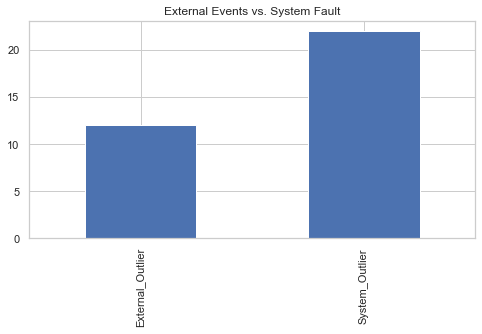

In [152]:
df_outliers = df_hourly[df_hourly['Outlier_iso']]
df = df_outliers[['External_Outlier', 'System_Outlier']]
df = df.apply(pd.value_counts)
df.iloc[1,].plot.bar(title='External Events vs. System Fault');

In [155]:
df_hourly.columns

Index(['Ozone', 'H2S', 'VOC', 'CO2', 'PM10', 'Temp_int', 'Humidity_int',
       'Temp_ext', 'Humidity_ext', 'H2S_Out', 'VOC_Out', 'CO2_Out', 'PM_Out',
       'Tempint_Out', 'Tempext_Out', 'Humidext_Out', 'Outlier_uni',
       'External_Outlier', 'System_Outlier', 'Outlier_iso'],
      dtype='object')

In [156]:
df_hourly[df_hourly['Outlier_iso']][['Ozone', 'H2S', 'VOC', 'CO2', 'PM10', 'Temp_int', 'Humidity_int',
       'Temp_ext', 'Humidity_ext', 'External_Outlier', 'System_Outlier']]

,Ozone,H2S,VOC,CO2,PM10,Temp_int,Humidity_int,Temp_ext,Humidity_ext,External_Outlier,System_Outlier
Time,,,,,,,,,,,
2020-05-26 08:00:00,0.21,0.00080,0.268,471,14.678,24,46,23,48,False,True
2020-05-26 09:00:00,0.21,0.00027,0.763,512,5.800,24,47,23,50,False,True
2020-05-27 08:00:00,0.22,0.00102,0.640,440,8.471,24,54,24,50,False,True
2020-05-27 09:00:00,0.22,0.00098,0.711,518,8.388,24,51,24,46,False,True
2020-05-27 10:00:00,0.21,0.00091,0.716,575,9.759,24,48,24,46,False,True
2020-05-27 11:00:00,0.21,0.00063,0.216,614,8.590,24,48,24,46,False,True
2020-05-27 13:00:00,0.21,0.00018,1.782,634,7.252,24,48,24,46,False,True
2020-05-27 14:00:00,0.20,0.00080,1.138,685,11.656,24,49,25,46,False,True
2020-05-27 15:00:00,0.20,0.00028,2.118,711,11.323,24,49,25,45,False,True


In [157]:
# serialize 

df_hourly.to_pickle('Data/df_hourly_outliers')